4.3 Find the array factor for a two element array with 

(a) Thinking about the relative phase of the fields radiated by the two elements and how they add in the far field

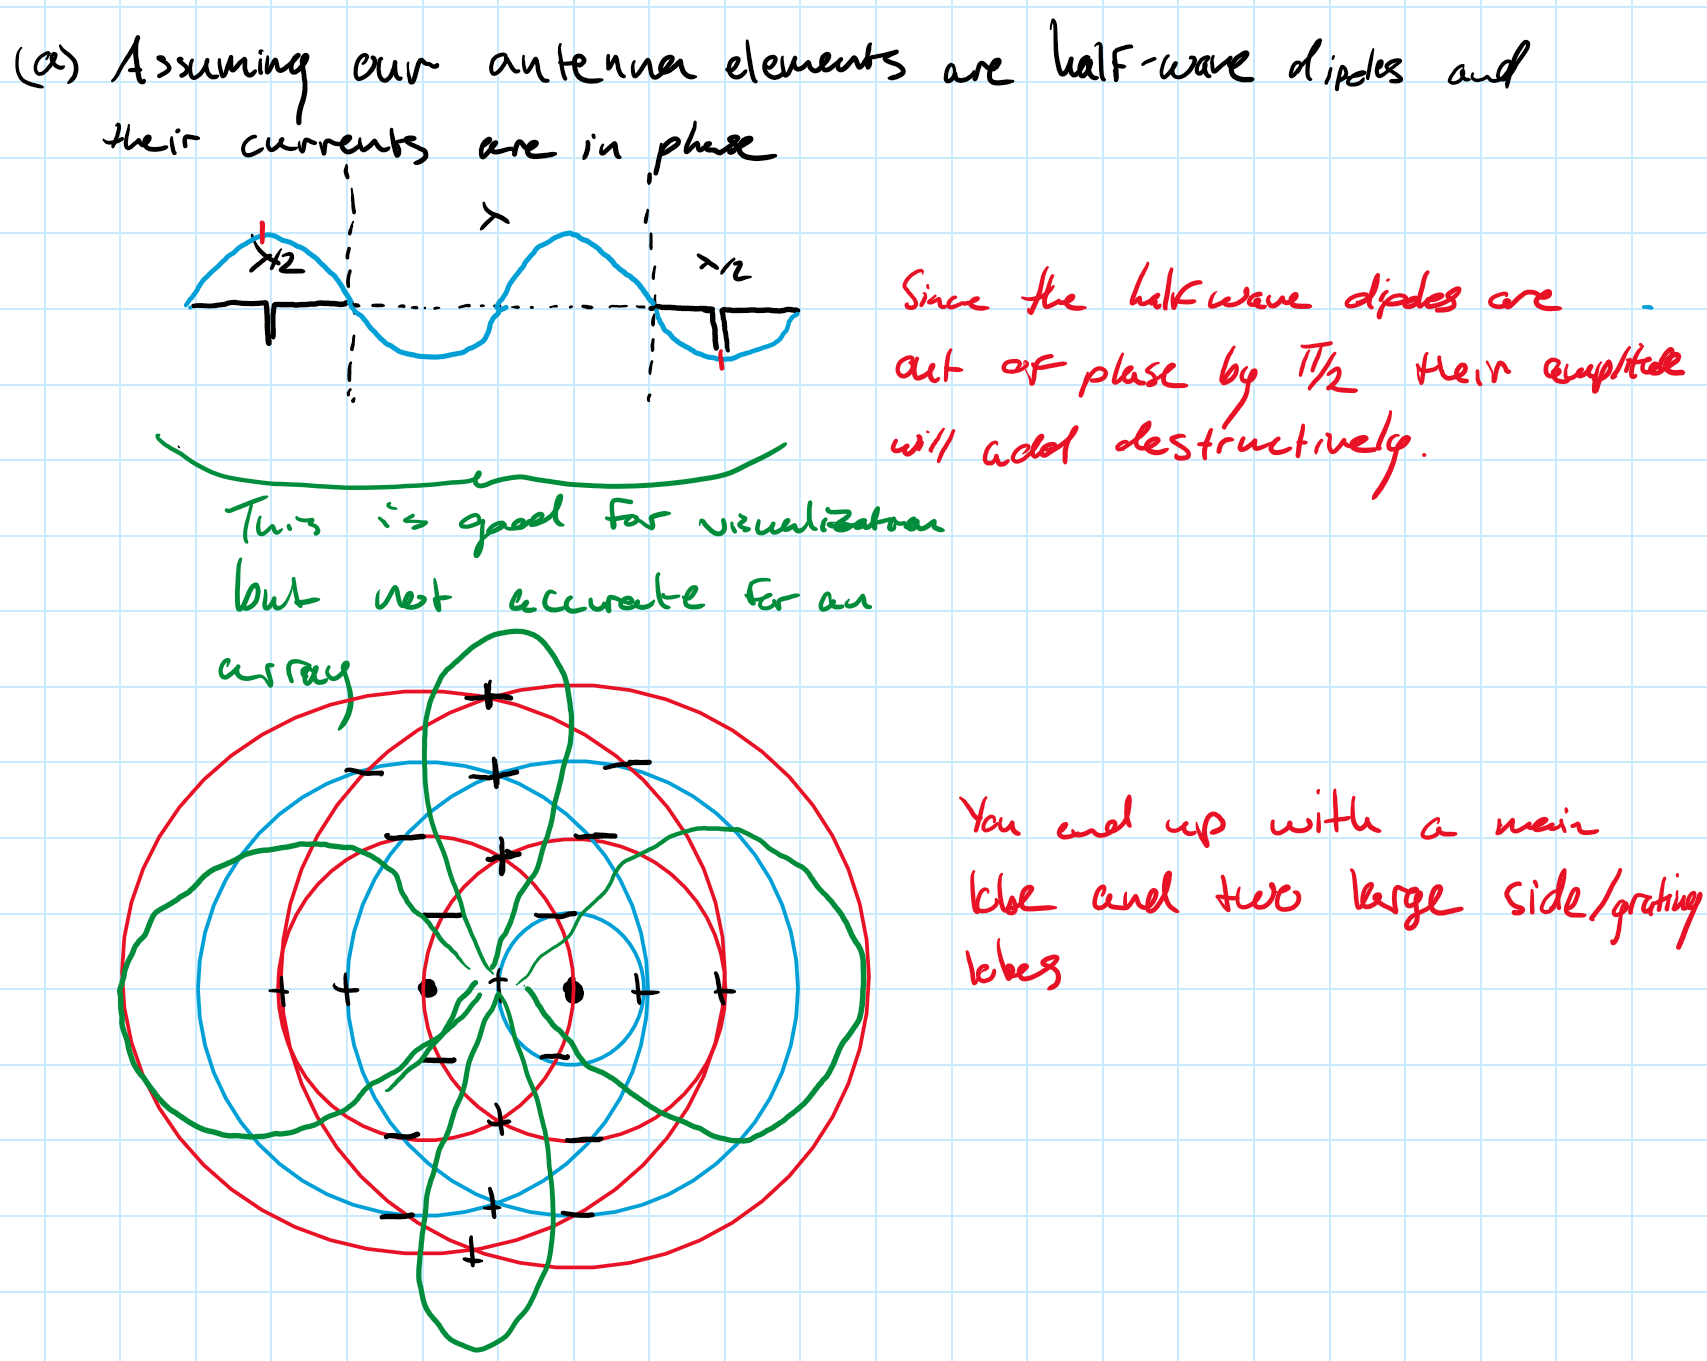

In [30]:
# python code to include the image
from IPython.display import Image
from IPython.core.display import HTML 

# show work done by hand
display(Image("10-a-work.png", width=500, height=500))

(b) Plotting the phasors which sum to the array factor in the complex plane as a function of angle

Using equation (4.3) in the book $$ A(\theta,\phi)=\sum_{n=1}^{N}\frac{i_n}{I_0}e^{jk.r_n} $$ we can plot the phasors as a function of angle. This can be done by setting $r_n=nk\cos\theta$ giving the phasor $$ e^{jknd\cos\theta} $$

theta0 =  60.00000000000001


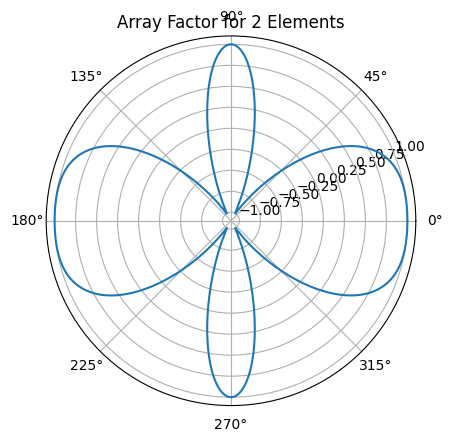

In [31]:
import numpy as np
import matplotlib.pyplot as plt

f = 2.4e9                                   # frequency
lam = 3e8/f                                 # wavelength
d = lam                                     # spacing
k = 2*np.pi/lam                             # wavenumber
n = 1                                       # number of elements
theta = np.linspace(0.01, 2*np.pi, 1000)    # angle
A = np.exp(1j*k*d*n*np.cos(theta))          # array factor

# angle for minimum
print("theta0 = ", np.arccos(1/2) * 180/np.pi)

# plots
plt.polar(theta, A)
plt.title("Array Factor for 2 Elements")
plt.show()

(c) visible window method

For the visible window method the array factor is calculated with the Dirichlet function 

$$ F_a(u)=\frac{\sin^2(Nu/2)}{\sin^2(u/2)} $$ 

where $u=kd\cos\theta$. Once plotted a window is chosen in the following way 

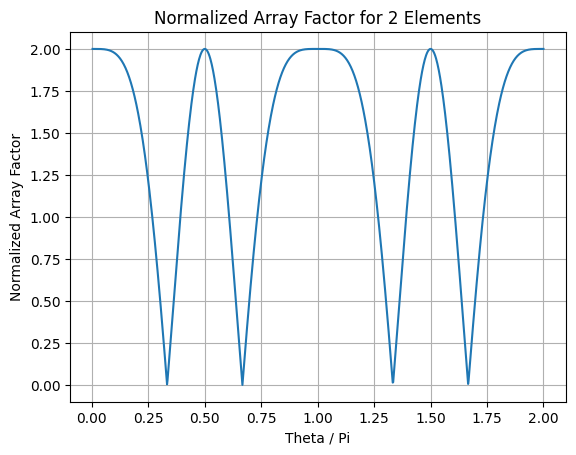

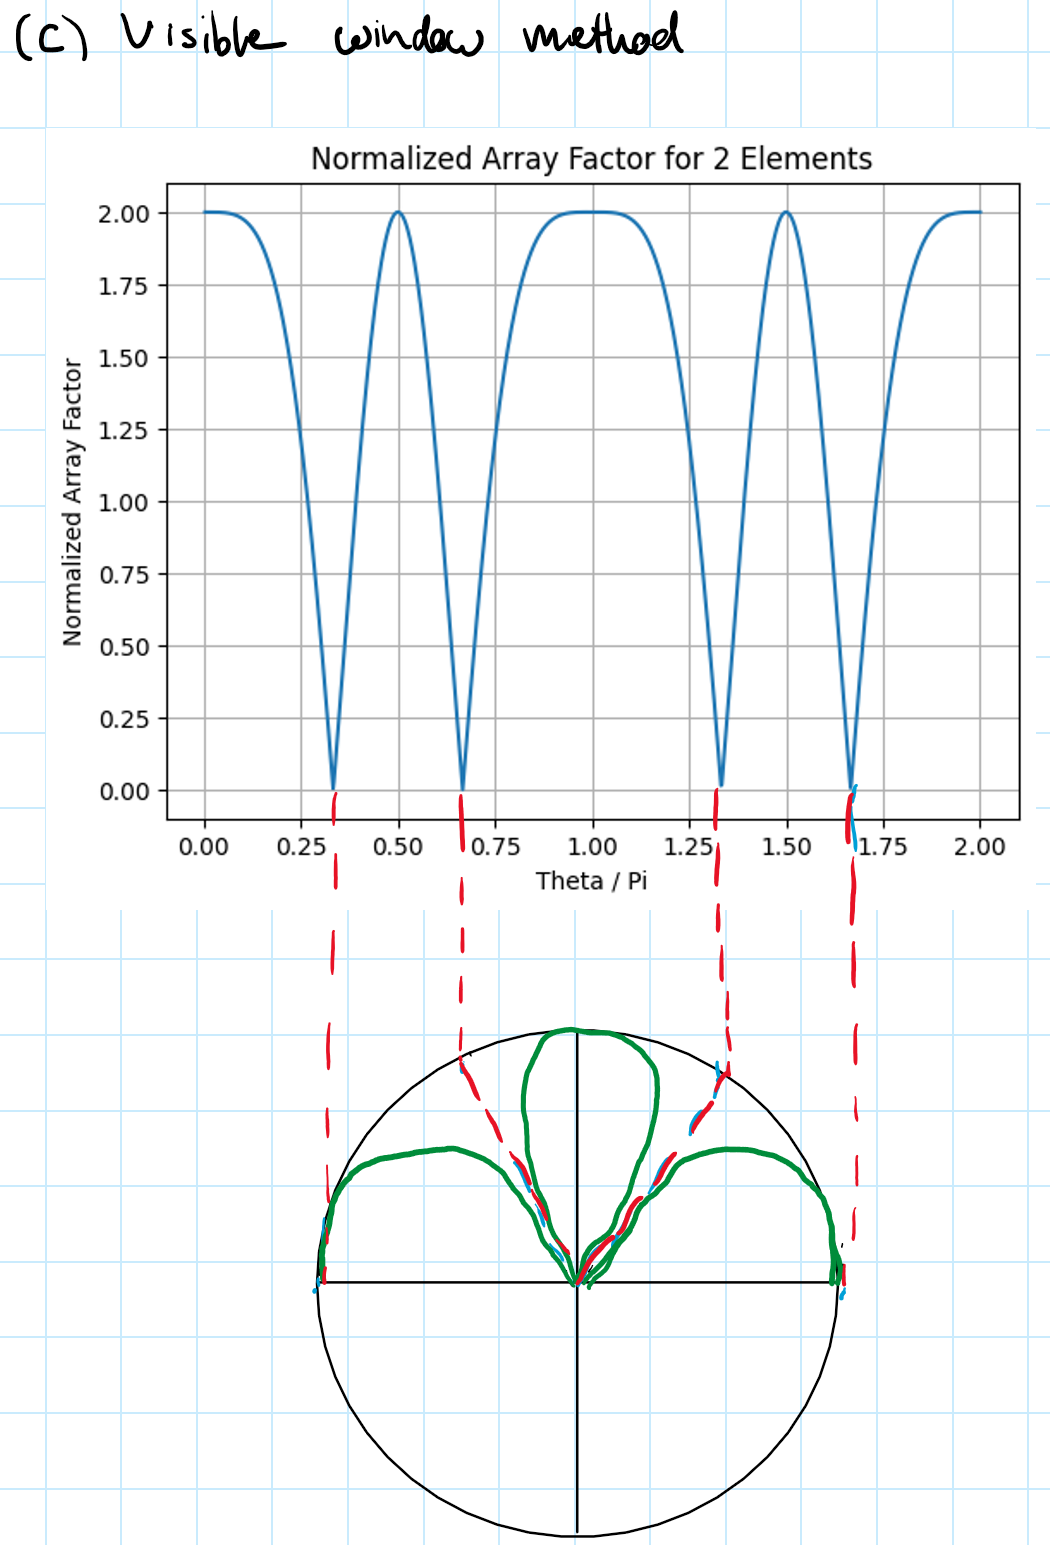

In [32]:
u = k*d*np.cos(theta)
N = 2
F = np.sin(N*u/2)/np.sin(u/2)
plt.plot(theta/(np.pi), np.abs(F))
plt.title("Normalized Array Factor for 2 Elements")
plt.xlabel("Theta / Pi")
plt.ylabel("Normalized Array Factor")
plt.grid()
plt.show()

# import image
display(Image("10-c-work.png", width=500, height=500))

(d) schelkunoff's unit circle representation

The array factor given by $$ A(\theta)=\sum_{n=0}^{N}i_ne^{jn(kd\cos\theta-\alpha)} $$

We want to plot the poles and zeros with the eqaution $$ f(z) = \prod_{n=1}^{N}(z-z_n) $$

Our zeros occur at $z=z_n$

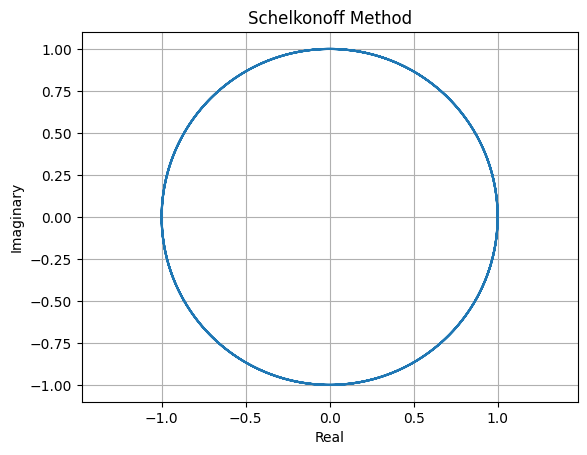

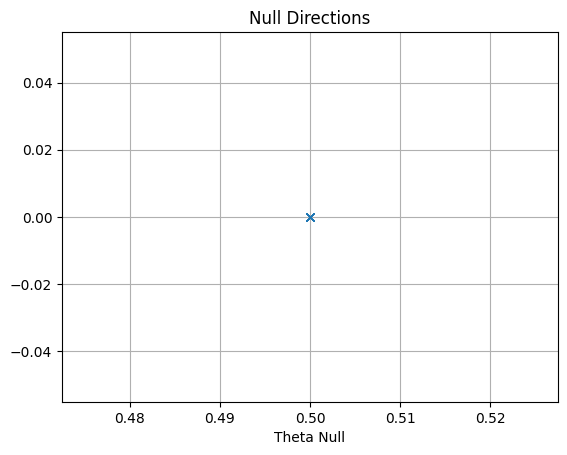

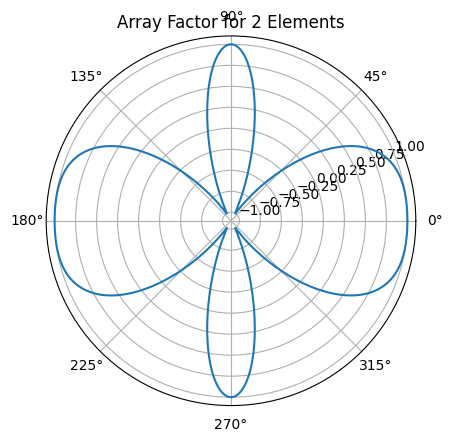

In [33]:
# Schelkonoff Method - plot the unit circle

# preliminary math

display(Image("10-a-work.png", width=500, height=500))

N = 1
n = np.linspace(1, N)
alpha = 0
z = np.exp(1j*N*(k*d*np.cos(theta)-alpha))
z_n = np.exp(1j*2*np.pi*n/(N+1))

# get theta for which the amplitude is zero
plt.plot(np.real(z), np.imag(z))
plt.plot(np.real(z_n), np.imag(z_n))
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Schelkonoff Method")
plt.grid()
plt.axis("equal")
plt.show()

theta_null = np.angle(z_n)/(k*d)
plt.plot(theta_null, np.zeros_like(theta_null), "x")
plt.title("Null Directions")
plt.xlabel("Theta Null")
plt.grid()
plt.show() 

plt.polar(theta, z)
plt.title("Array Factor for 2 Elements")
plt.show()

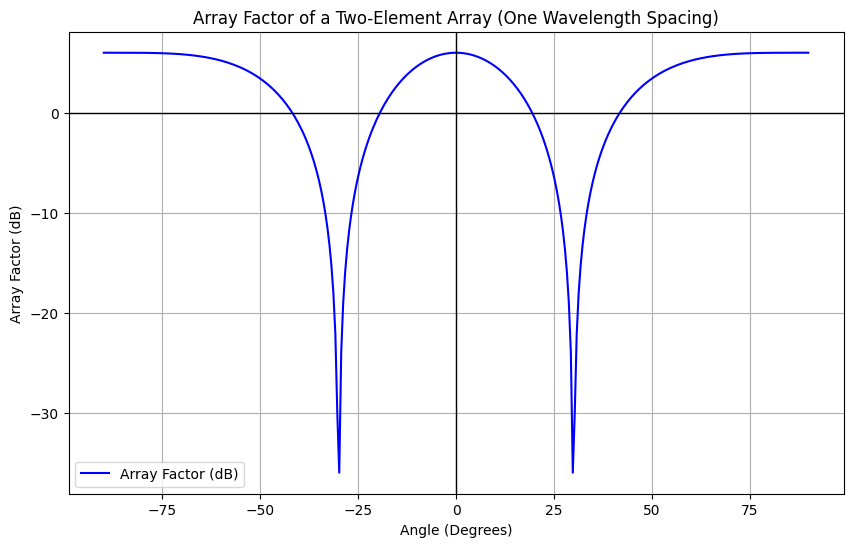

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define the array factor function
def array_factor(theta):
    # Convert theta to radians
    theta_rad = np.radians(theta)
    # Compute the array factor using the formula
    AF = 1 + np.exp(1j * 2 * np.pi * np.sin(theta_rad))
    return AF

# Define the range of angles for plotting (from -90 to 90 degrees)
theta = np.linspace(-90, 90, 360)

# Compute the array factor for each angle
AF_values = array_factor(theta)

# Calculate the magnitude of the array factor
AF_magnitude = np.abs(AF_values)

# Plot the array factor magnitude (in dB scale)
plt.figure(figsize=(10, 6))
plt.plot(theta, 20 * np.log10(AF_magnitude), label="Array Factor (dB)", color='b')
plt.title('Array Factor of a Two-Element Array (One Wavelength Spacing)')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Array Factor (dB)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.show()
